# Customer Personality Segmentation

### Goal:
Use Clustering methods to seperate customers into groups with similar personalities. 


<img title="Clustering" alt="Alt text" src="https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png">

### Data Set Information:
Customer Segmentation is a useful analysis for a Business to better interpret their customers. Customer segmentation can provide details on their behaviors, specific needs, and concerns which provides a business a better understanding on their customers. The segmentation can guide a company to better market and modify their products in a strategic manner to reduce cost and maximize profits.

This data set was downloaded from kaggle which can be found [here.](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)


### Data Set Attributes

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seaborn color palette
color_pal = sns.color_palette()

In [2]:
# set print column options to 500
pd.set_option('display.max_columns', 500)

In [3]:
# load the data
customers = pd.read_csv('marketcampaign_cl.csv')

# make a copy of our dataframe to work with
df = customers.copy()
    
# dataframe dimensions
print(f'Data Frame Shape: {df.shape}')
print(f'Data Frame Size: {df.size}')

Data Frame Shape: (2216, 34)
Data Frame Size: 75344


We are given a total of 34 attributes and 2216 observations in our data set.

## Exploratory Data Analysis

In [4]:
# column info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   int64  
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

In [5]:
# first 5 observations
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spent,total_response,CustomerAge,TimeASCustomer
0,1,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,1,64,8.331507
1,2,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,67,6.824658
2,3,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,56,7.369863
3,4,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,37,6.895890
4,5,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,40,6.956164


In [6]:
# drop unnamed column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
# first 10 observations
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spent,total_response,CustomerAge,TimeASCustomer
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,1,64,8.331507
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,67,6.824658
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,56,7.369863
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,37,6.895890
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,40,6.956164
5,7446,1967,Master,Together,62513,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,716,0,54,7.317808
6,965,1971,Graduation,Divorced,55635,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,590,0,50,8.139726
7,6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,169,0,36,7.657534
8,4855,1974,PhD,Together,30351,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,1,47,7.578082
9,5899,1950,PhD,Together,5648,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,49,1,71,6.810959


In [8]:
# check how many each ID appears
df['ID'].value_counts()

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64

In [9]:
# count on the class of Education column
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [10]:
# count on class for Marital Status
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
# Satistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.000000,2814.750000,5458.500000,8421.750000,11191.000000
Year_Birth,2216.0,1968.820397,11.985554,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.0,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2216.0,0.441787,0.536896,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2216.0,0.505415,0.544181,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2216.0,49.012635,28.948352,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2216.0,305.091606,337.327920,0.000000,24.000000,174.500000,505.000000,1493.000000
MntFruits,2216.0,26.356047,39.793917,0.000000,2.000000,8.000000,33.000000,199.000000
MntMeatProducts,2216.0,166.995939,224.283273,0.000000,16.000000,68.000000,232.250000,1725.000000
MntFishProducts,2216.0,37.637635,54.752082,0.000000,3.000000,12.000000,50.000000,259.000000


Observe how the income feature mean and standard deviation are not relatively close to the maximum value in the column. Ths implies we might want to check for outliers in this feature and consider scaling the data set for optimal model performance. 

In [12]:
# check for missing values
df.isna().sum().sum()

0

In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
# drop duplicate values
df.drop_duplicates(inplace = True)

In [15]:
# change dt_customers to datatime datatype
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## Visualizations

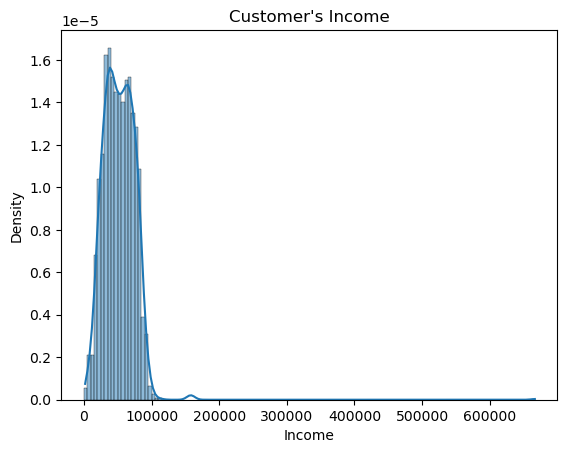

In [16]:
# density histogram on Customers Income
sns.histplot(x = 'Income', data = df, stat = 'density', alpha = 0.5, kde = True, binrange = [0,120000])
plt.title("Customer's Income")
plt.show()

Observe after a customers income becomes over 200,000 they become outliers to a majority of othr customers in the dataset. These outliers might alter the performance of the model thus we drop them from our data frame. We set the threshold to 300,000. 

In [17]:
# choose the customers who income is less than 300000
df = df.loc[df['Income'] < 250000]

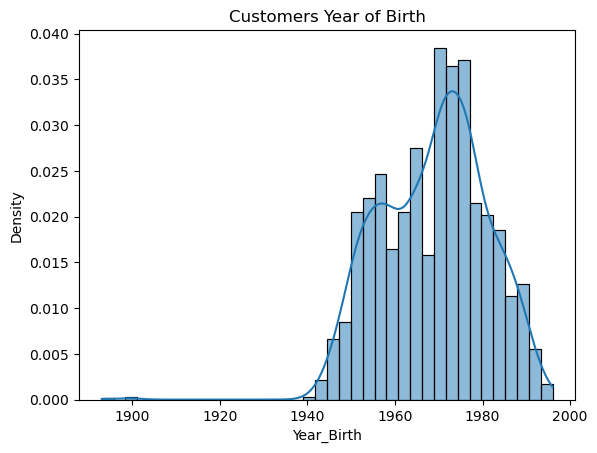

In [18]:
# density plot customers Year of Birth
sns.histplot(x = 'Year_Birth', data = df, stat = 'density', alpha = 0.5, kde = True)
plt.title("Customers Year of Birth")
plt.show()

Similarly observing the histogram above we can see that customers who were born before 1930 are outliers to our dataset. Therefore, we also drop these observations from our dataframe to perform better clustering analysis.

In [19]:
# choose customers who were born greater than 1930
df = df.loc[df['Year_Birth'] > 1930]

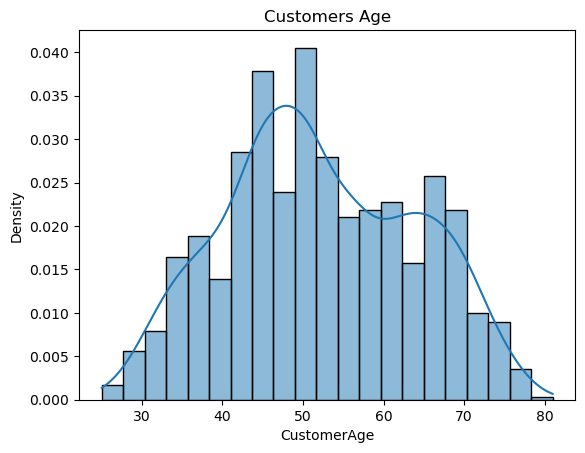

In [20]:
# Density plot on Customers Age
sns.histplot(x = 'CustomerAge', data = df, stat = 'density', alpha = 0.5, kde = True)
plt.title("Customers Age")
plt.show()

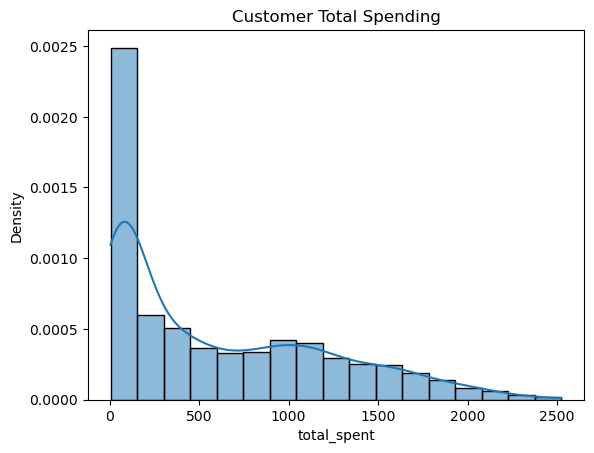

In [21]:
# Histogram on Customers Total Spending
sns.histplot(x = 'total_spent', data = df, stat = 'density', alpha = 0.5, kde = True)
plt.title("Customer Total Spending")
plt.show()

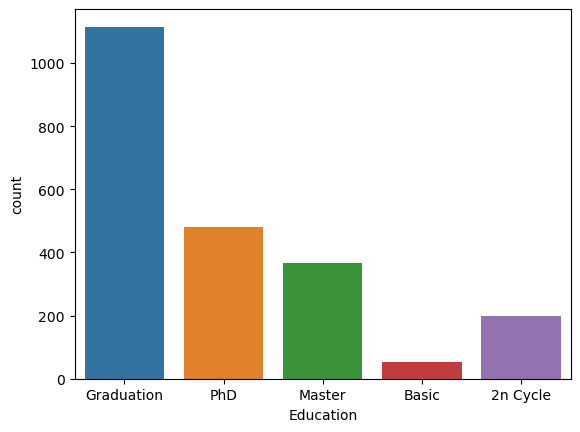

In [22]:
# Count plot on Education
sns.countplot(x = 'Education', data = df)
plt.show()

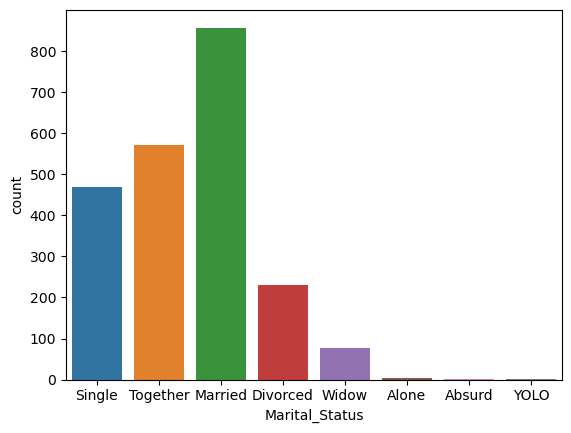

In [23]:
# Count plot on Marital STatus
sns.countplot(x = 'Marital_Status', data = df)
plt.show()

In [24]:
# update observations on Marital Staus that says alone to single
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'Divorced', 'Marital_Status'] = 'Separated'
df.loc[df['Marital_Status'] == 'Widow', 'Marital_Status'] = 'Separated'
df.loc[df['Marital_Status'] == 'Married', 'Marital_Status'] = 'Together'

# combine the 2n Cycle class in education to Master
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Master'
# combine columns of kids and teenagers to children
df["Children"] = df["Kidhome"]+df["Teenhome"]

# drop observations thta have absurd or yolo for marital status
name = ['Absurd','YOLO']
df = df[df.Marital_Status.isin(name) == False]

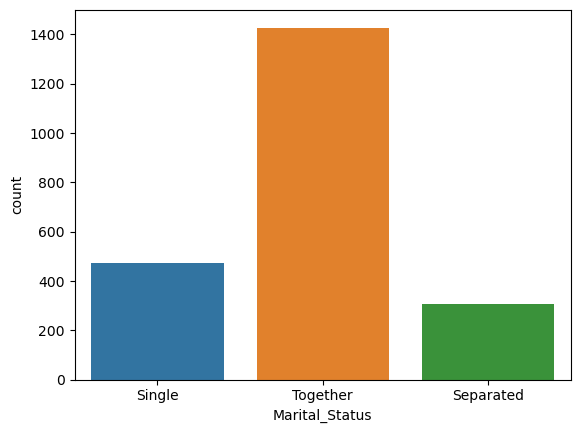

In [25]:
# count plot Marital Status
sns.countplot(x = 'Marital_Status', data = df)
plt.show()

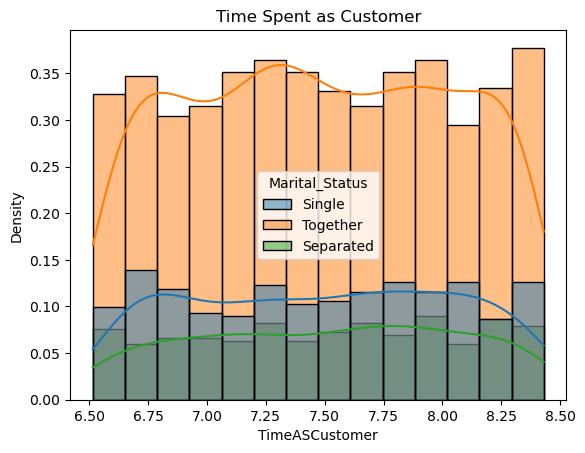

In [26]:
# histogram on Time of Customer
sns.histplot(x = 'TimeASCustomer',hue = 'Marital_Status', data = df, stat = 'density', alpha = 0.5, kde = True)
plt.title("Time Spent as Customer")
#plt.legend(loc = 'upper left')
plt.show()

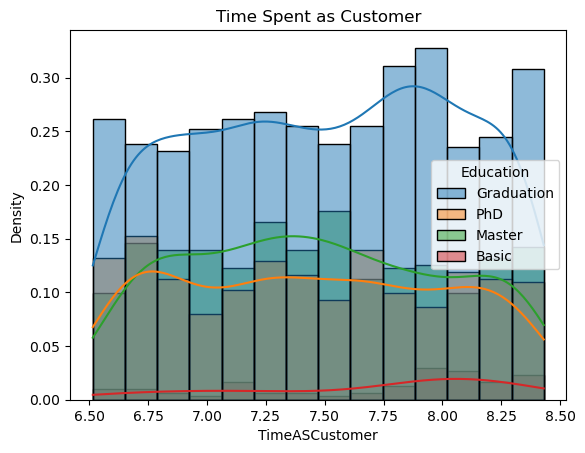

In [27]:
# histogram on Time of Customer
sns.histplot(x = 'TimeASCustomer', 
             hue = 'Education', 
             data = df, stat = 'density', 
             alpha = 0.5, 
             kde = True)
plt.title("Time Spent as Customer")

#plt.legend(loc = 'upper left')
plt.show()

## Data Preprocessing for Modeling

In [28]:
# create 2 copies of our cleaned dataframe
df_clean = df.copy()
new_df = df.copy()

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
# label encoder algorithm 
le = LabelEncoder()

# categorical features
encode_names = ['Education', 'Marital_Status']
for encode in encode_names:
    new_df[encode] = le.fit_transform(new_df[encode])

In [31]:
new_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spent,total_response,CustomerAge,TimeASCustomer,Children
0,5524,1957,1,1,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,1,64,8.331507,0
1,2174,1954,1,1,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,67,6.824658,2
2,4141,1965,1,2,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,56,7.369863,0
3,6182,1984,1,2,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,37,6.895890,1
4,5324,1981,3,2,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,40,6.956164,1


All of our categorical variables have been encoded

In [32]:
# feature Selection
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'total_spent', 'total_response', 'CustomerAge', 'TimeASCustomer',
       'Children'],
      dtype='object')

In [33]:
# predictors used for our model
# observe we reduced the features from 34 to 20
Features = ['Education', 'Marital_Status', 'Income', 'Children',
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'total_spent', 
            'total_response', 'CustomerAge', 'TimeASCustomer']

new_df = new_df[Features]
df_features = new_df.copy()

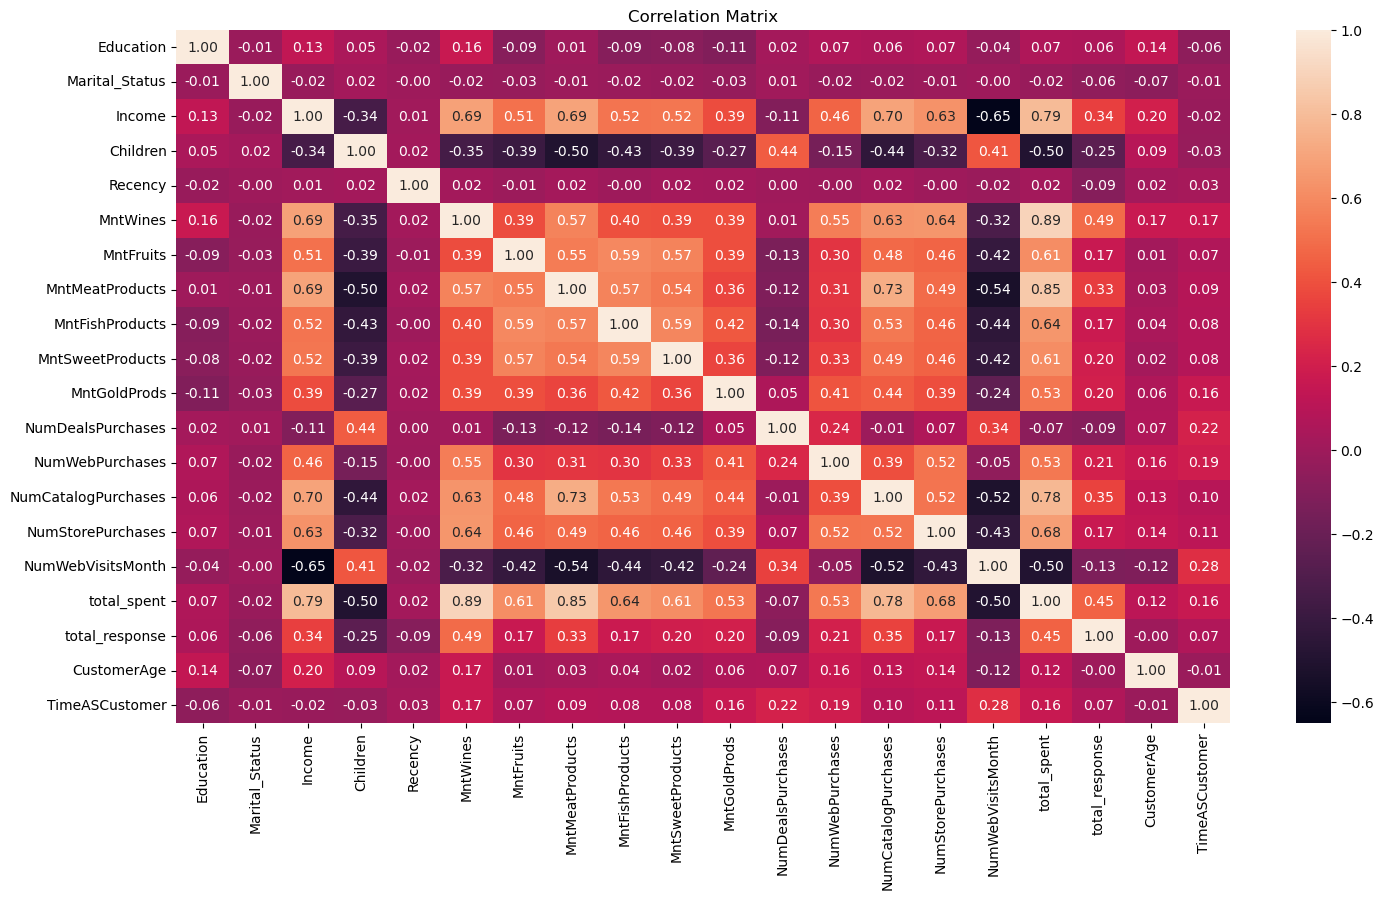

In [34]:
corr = new_df.corr(numeric_only = True)
plt.figure(figsize = (17,9))
sns.heatmap(corr, annot = True, fmt = '0.2f')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix on our data frame we can see we have a negative correlation between income and number of websites visits. Therefore we can expect a decrease in website visits as income increases witha correlation score of -0.65. We can also see we have a strong correlation of 0.79 between income and total spent on groceries, thus we can see as income increases so does total spending in store. It makes sense income is high correlated with the items purchased. 

In [35]:
# scale our data
# standardization algorithm
scaler = StandardScaler()

# standardize our dataframe
new_df = scaler.fit_transform(new_df)

In [36]:
# check numpy array
new_df

array([[-0.78950484, -0.69868461,  0.28768874, ...,  0.61907124,
         1.01791512,  1.52939119],
       [-0.78950484, -0.69868461, -0.26005723, ..., -0.50226534,
         1.2744367 , -1.18812217],
       [-0.78950484,  0.67749347,  0.91350499, ..., -0.50226534,
         0.33385757, -0.20487643],
       ...,
       [-0.78950484, -2.07486269,  0.23395446, ...,  0.61907124,
        -1.03425752, -0.98060297],
       [ 0.40122377,  0.67749347,  0.80352852, ..., -0.50226534,
         1.10342231, -0.97566204],
       [ 1.59195237,  0.67749347,  0.04298181, ...,  0.61907124,
         1.2744367 ,  1.32681292]])

## K Means Clustering

K-means clustering is a popular unsupervised machine learning algorithm used to group data points into clusters based on their similarity. Here are the steps for the algorithm:

1. Choose the number of clusters (K) you want to create.
2. Randomly initialize K cluster centroids.
3. Assign each data point to the nearest centroid. The distance between a data point and a centroid is typically calculated using Euclidean distance.
4. Recalculate the centroids of each cluster by taking the mean of all the data points assigned to it.
5. Repeat steps 3 and 4 until the centroids no longer change or a maximum number of iterations is reached.

The algorithm tries to minimize the sum of squared distances between the data points and their respective centroid. The resulting clusters are characterized by their centroids, which represent the center of the cluster. K-means clustering is sensitive to the initial placement of the centroids and can converge to a suboptimal solution, so it's important to run the algorithm multiple times with different initializations and choose the best result based on some criterion, such as the silhouette score.

In [37]:
from sklearn import cluster, metrics

In [38]:
# k means clustering
kmeans = cluster.KMeans(n_init = 'auto', random_state = 0)
kmeans.fit(new_df)

KMeans(n_init='auto', random_state=0)

<Figure size 1500x800 with 0 Axes>

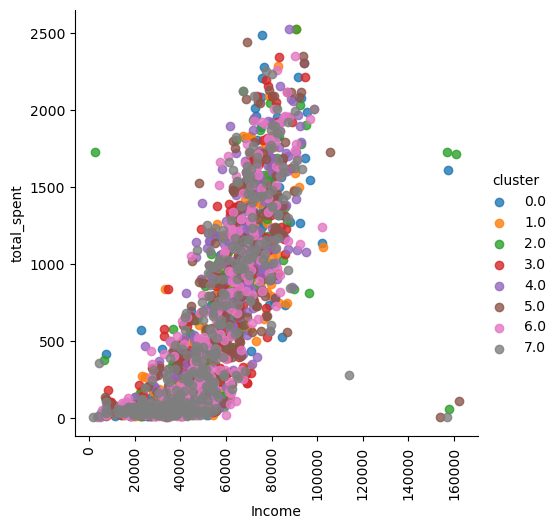

In [39]:
# Plot the clusters

# labels_ are assigned to every observation based on the cluster the observation is assigned to
labels = pd.DataFrame(kmeans.labels_)

# cluster_centers_ give coordinated of the cluster centroid across every feature
labels.rename(columns={0: "cluster"}, inplace=True)

X_orig = df_clean.copy()
graph = pd.concat([X_orig,labels], axis=1)

plt.figure(figsize = (15,8))
sns.lmplot(x='Income',y='total_spent', data=graph, hue='cluster', fit_reg=False)
plt.xticks(rotation = 90)
plt.show()

Remember that the clusters may appear to overlap because they are being separated by other features

### Choosing the optimal number of clusters - Elbow Method

The elbow method is a popular technique used in unsupervised machine learning to determine the optimal number of clusters to use in a clustering algorithm such as K-means. The "interim plot elbow method" likely refers to a variant of the elbow method where an interim plot is used to visualize the elbow point.

Here are the general steps for the elbow method:

1. Run the clustering algorithm for a range of K values (e.g., 2 to 10).
2. For each K value, calculate the sum of squared distances between each data point and its assigned centroid (often called the "within-cluster sum of squares" or WCSS).
3. Plot the WCSS values against the number of clusters (K).
4. Look for the "elbow point" in the plot, which is the point of diminishing returns where adding more clusters doesn't significantly decrease the WCSS.

The idea behind the elbow method is that as you increase the number of clusters, the WCSS should decrease, since each cluster will be more tightly focused around its centroid. However, there will come a point where adding more clusters doesn't lead to much additional improvement in the WCSS, since the clusters will be too small and noise will start to dominate. This point is often referred to as the "elbow point", and is usually chosen as the optimal number of clusters.

In the interim plot elbow method, an additional plot is created to visualize the rate of change of the WCSS values as K increases. This plot can help to identify the elbow point more easily, since it shows how quickly the WCSS is decreasing for each value of K. By looking for the point where the rate of change starts to level off, you can often identify the optimal number of clusters more clearly.

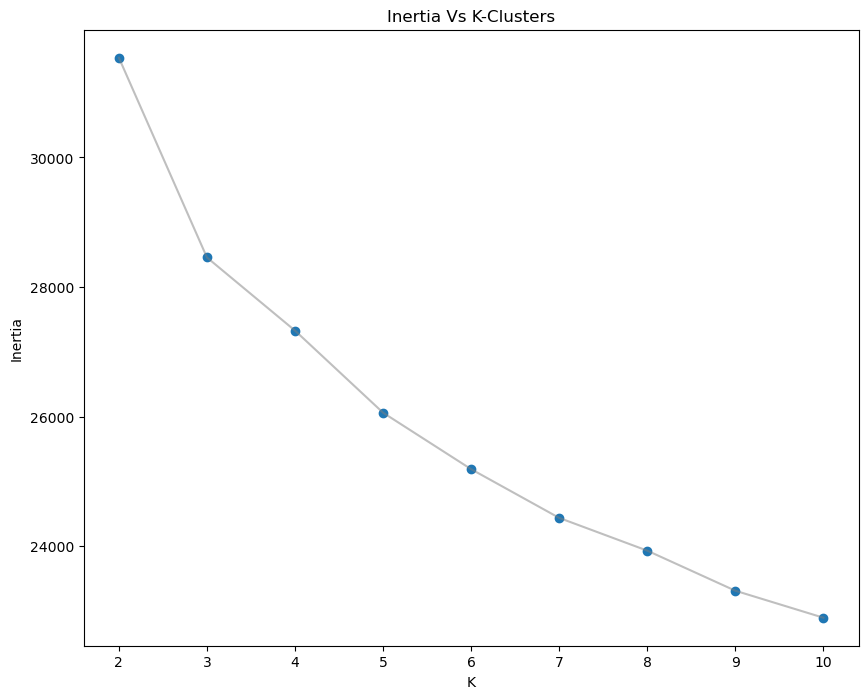

In [40]:
# get the interia_ attribute for K-means fit with increasing k
inertias = []
for k in [2,3,4,5,6,7,8,9,10]:
    km = cluster.KMeans(n_clusters=k,n_init = 'auto', random_state = 0)
    km.fit(new_df)
    inertias.append(km.inertia_)
    
# plot inertia for various k (2 to 8)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot([2,3,4,5,6,7,8,9,10], inertias, c='grey', alpha=0.5)
ax.scatter([2,3,4,5,6,7,8,9,10], inertias)
ax.set_title('Inertia Vs K-Clusters')
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Using the elbow method to find out the optimal number of clusters k, the inertia vs K value plot above indicates 3 is the best number of clusters for our dataset. We want low inertia and low number of clusters for our model. We also have to keep in mind to not over fit our model.

### Choosing the optimal number of clusters - Silhouette Score

The silhouette score is a metric used to evaluate the quality of clusters produced by a clustering algorithm such as K-means. It provides a measure of how well each data point fits into its assigned cluster, based on both how close it is to other points in its cluster and how far it is from points in neighboring clusters.

The silhouette score ranges from -1 to 1, with a score of 1 indicating that the data point is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicating the opposite. A score of 0 indicates that the point is roughly equally close to points in its own cluster and neighboring clusters.

In practice, the silhouette score is calculated as the mean silhouette coefficient across all data points in the dataset. The silhouette coefficient for a single data point is calculated as $\frac{b - a}{max(a, b)}$, where a is the average distance between the point and all other points in its own cluster, and b is the average distance between the point and all points in the nearest neighboring cluster.

A higher silhouette score indicates that the clustering algorithm has produced more distinct and well-separated clusters, while a lower score suggests that the clustering may not be optimal or that the data may not be well-suited to clustering.

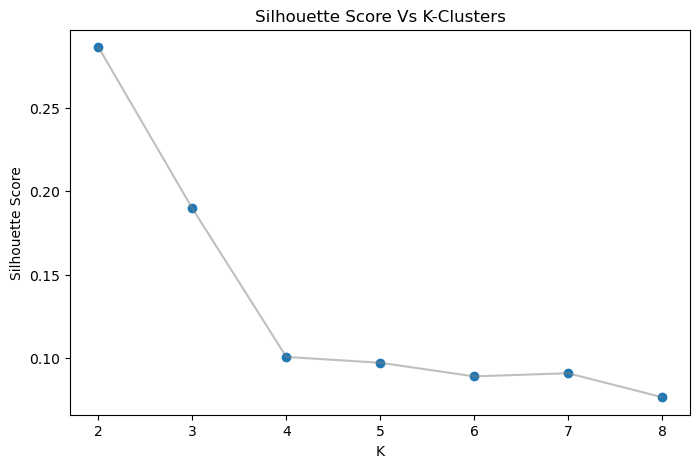

In [41]:
## Choosing the optimal number of clusters

s_scores = []
for k in [2,3,4,5,6,7,8]:
    km = cluster.KMeans(n_clusters=k, n_init = 'auto', random_state = 0)
    km.fit(new_df)
    s_scores.append(metrics.silhouette_score(new_df, km.labels_, metric='euclidean'))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([2,3,4,5,6,7,8], s_scores, c='grey', alpha=0.5)
ax.scatter([2,3,4,5,6,7,8], s_scores)
ax.set_title('Silhouette Score Vs K-Clusters')
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
plt.show()

Based on the graph above we can see two clusters gave the highest silhoutte score, thus we use 2 clusters for our Kmeans algorithm.

## K Means Clustering - 2 Clusters

In [42]:
# instantiate our 2 clustering model
kmeans_2 = cluster.KMeans(n_clusters = 2, n_init = 'auto', random_state = 0)

# fit the training data to our model
kmeans_2.fit(new_df)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [43]:
# Silhouette Score
silhouette_avg = metrics.silhouette_score(new_df, kmeans_2.labels_)
silhouette_avg

0.2861341103187428

<Figure size 1500x800 with 0 Axes>

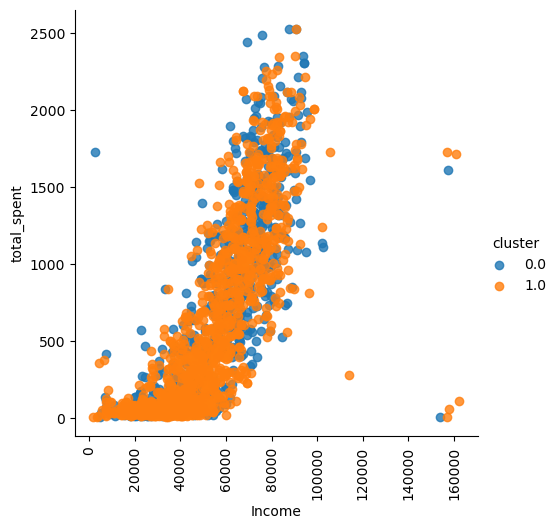

In [44]:
# Plot the clusters

# labels_ are assigned to every observation based on the cluster the observation is assigned to
labels = pd.DataFrame(kmeans_2.labels_)

# cluster_centers_ give coordinated of the cluster centroid across every feature
labels.rename(columns={0: "cluster"}, inplace=True)

X_orig = df_clean.copy()
df_labeled = pd.concat([X_orig,labels], axis=1)

plt.figure(figsize = (15,8))
sns.lmplot(x = 'Income', y = 'total_spent', data=df_labeled, hue='cluster', fit_reg=False)
plt.xticks(rotation = 90)
plt.show()

In [45]:
df_labeled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spent,total_response,CustomerAge,TimeASCustomer,Children,cluster
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,1617.0,1.0,64.0,8.331507,0.0,0.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,27.0,0.0,67.0,6.824658,2.0,1.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,776.0,0.0,56.0,7.369863,0.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,53.0,0.0,37.0,6.895890,1.0,1.0
4,5324.0,1981.0,PhD,Together,58293.0,1.0,0.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,422.0,0.0,40.0,6.956164,1.0,1.0


In [46]:
# seperating our 2 clusters
cluster_1 = df_labeled.loc[df_labeled['cluster'] == 0.0]
cluster_2 = df_labeled.loc[df_labeled['cluster'] == 1.0]

In [47]:
cluster_1.shape, cluster_2.shape

((864, 35), (1344, 35))

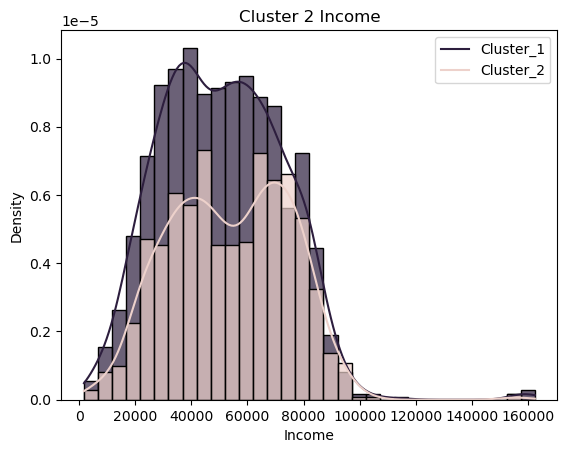

In [48]:
# cluster 2 income density histogram
sns.histplot(x = 'Income', data = df_labeled, stat = 'density', kde = True, alpha = 0.7, hue = 'cluster')
plt.title('Cluster 2 Income')
plt.legend(labels = ['Cluster_1','Cluster_2'])
plt.show()

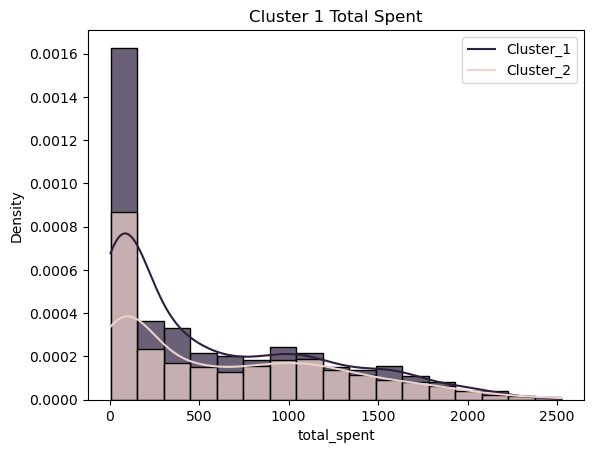

In [49]:
# cluster 1 Total Spending density histogram
sns.histplot(x = 'total_spent', data = df_labeled, stat = 'density', kde = True, alpha = 0.7, hue = 'cluster')
plt.title('Cluster 1 Total Spent')
plt.legend(labels = ['Cluster_1','Cluster_2'])
plt.show()

In [50]:
# Clusters Column Means

In [51]:
df_means_2 = pd.DataFrame(data = [cluster_1.mean(numeric_only = True), cluster_2.mean(numeric_only = True)], 
                          columns = cluster_1.columns, index = ['Cluster_1', 'Cluster_2'])

In [52]:
print(df_means_2.T)

                        Cluster_1     Cluster_2
ID                    5566.095128   5583.600448
Year_Birth            1968.736659   1969.026139
Education                     NaN           NaN
Marital_Status                NaN           NaN
Income               53773.498840  50763.979836
Kidhome                  0.389791      0.475728
Teenhome                 0.474478      0.525765
Dt_Customer                   NaN           NaN
Recency                 49.441995     48.788648
MntWines               329.112529    289.546677
MntFruits               28.636891     24.834205
MntMeatProducts        187.881671    153.901419
MntFishProducts         42.660093     34.295743
MntSweetProducts        30.342227     24.972367
MntGoldProds            47.841067     41.120239
NumDealsPurchases        2.207657      2.395818
NumWebPurchases          4.295824      3.950709
NumCatalogPurchases      2.980278      2.472741
NumStorePurchases        6.009281      5.674384
NumWebVisitsMonth        5.189095      5

The data frame above returns the column means between the 2 clusters.

## Unpaired T-test

In [53]:
import scipy.stats as stats

In [54]:
columns = ['Income', 'Children', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
           'total_spent', 'total_response', 'CustomerAge', 'TimeASCustomer']

pvalue = []
t_statistic = []
for col in columns:
    test = stats.ttest_ind(a = cluster_1[col].tolist(), 
                b = cluster_2[col].tolist(), 
                alternative = 'two-sided',
                equal_var = False, 
                nan_policy = 'omit')
    
    pvalue.append(test.pvalue)
    t_statistic.append(test.statistic)

In [55]:
# creating a data frame where we conduct t-test for both clusters
df_dict = {'Columns': columns, 'T-Statistics': t_statistic, 'P-Value': pvalue}
df_test = pd.DataFrame(data = df_dict)

alpha = 0.05
p = 20

# Function to test our Null hypothesis, using significance level of 0.05
def hypothesis(df):
    if df < (alpha/p):
        return 'Reject Null'
    else:
        return 'Fail to Reject Null' 
    
# Creating a new column with Hypothesis Test results
df_test['Hypothesis'] = df_test['P-Value'].apply(hypothesis)

We conduct an unpaired T-test between all the numeric columns of Cluster 1 and Cluster 2 to check for statistical significance differences between them. Here we assume both Clusters do not come from the same population and conduct a two sides test where we compare the means between the columns of both Clusters. 

Our hypothesis test:

$H_0: \mu_{Cluster_1, i} = \mu_{Cluster2, i}$, where $i=$ all Columns

$H_a: \mu_{Cluster_1, i} \neq \mu_{Cluster2, i}$, where $i=$ all Columns

In [56]:
# check results
df_test

,Columns,T-Statistics,P-Value,Hypothesis
0,Income,3.213192,0.001335,Reject Null
1,Children,-4.251294,0.000022,Reject Null
2,Recency,0.515392,0.606342,Fail to Reject Null
3,MntWines,2.664487,0.007780,Fail to Reject Null
4,MntFruits,2.181306,0.029289,Fail to Reject Null
5,MntMeatProducts,3.409790,0.000665,Reject Null
6,MntFishProducts,3.432960,0.000611,Reject Null
7,MntSweetProducts,2.964397,0.003073,Fail to Reject Null
8,MntGoldProds,2.946625,0.003256,Fail to Reject Null
9,NumDealsPurchases,-2.270911,0.023263,Fail to Reject Null


## Chi-Square Test of Homogeneity

First, Chi-square test of independence is also used when you have two categorical variables. It allows you to test whether the two variables are related to each other. If two variables are independent (unrelated), the probability of belonging to a certain group of one variable isn’t affected by the other variable.

Chi-Square Test of homogeneity is a type of variety of Pearson’s chi-square test. It tests whether two populations come from the same distribution by determining whether the two populations have the same proportions as each other. You can consider it simply a different way of thinking about the chi-square test of independence. 

We are conducting a Chi-Square Test of homogeneity, where our Hypothesis test is:

$H_0:$ The 2 Clusters come from the same population

$H_a:$ The 2 Clusters do not come from the same population

In [57]:
# Pivot table on clusters and Education
pivot = pd.pivot_table(data = df_labeled[['Education','cluster']], 
                       columns = 'Education', 
                       index = 'cluster', 
                       aggfunc=len)
pivot

Education,Basic,Graduation,Master,PhD
cluster,,,,
0.0,13,454,218,177
1.0,41,656,343,299


In [58]:
# Do different samples come from the same population? 
# Do both Clusters Education level come from the same population?

observations = pivot.values
row_totals = np.array([np.sum(observations, axis=1)])
col_totals = np.array([np.sum(observations, axis=0)])
n = np.sum(observations)

# Calculate the expected observations
expected = np.dot(row_totals.T, col_totals) / n

# Calculate chi-square test statistic
chisq, p = stats.chisquare(observations, expected)
chisq = np.sum(chisq)

# Degrees of freedom
rows = observations.shape[0]
cols = observations.shape[1]
df = (rows - 1) * (cols - 1)

# Convert chi-square test statistic to p-value
p = 1 - stats.chi2.cdf(chisq, df)
print(f'p = {p:5.3f}')

p = 0.061


Now, using a significance level of $\alpha = 0.05$, we can see our our p-value is greater than $\alpha$. Therefore, we failed to reject our null hypothesis that 2 clusters Education Level come from the same population. Note, our p-value was 0.061 so our conclusion was near borderline. However, since we failed to reject the null hypothesis we conclude there was no difference between education levels between the two clusters. 

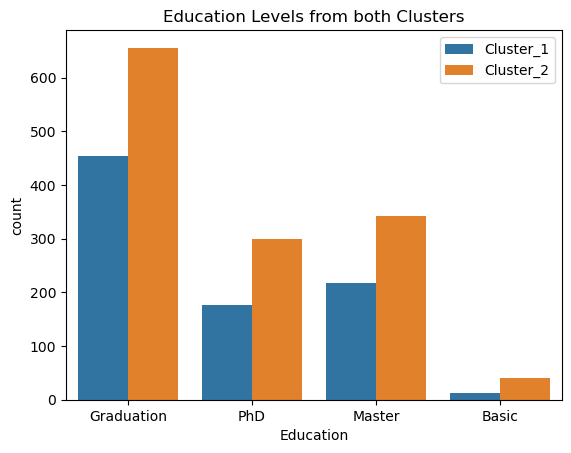

In [59]:
sns.countplot(x = 'Education', data = df_labeled, hue = 'cluster')
plt.title('Education Levels from both Clusters')
plt.legend(labels = ['Cluster_1','Cluster_2'])
plt.show()

In [60]:
# Pivot table on clusters and Education
pivot2 = pd.pivot_table(data = df_labeled[['Marital_Status','cluster']], 
                       columns = 'Marital_Status', 
                       index = 'cluster', 
                       aggfunc=len)
pivot2

Marital_Status,Separated,Single,Together
cluster,,,
0.0,129,196,537
1.0,177,276,886


In [61]:
# Do different samples come from the same population? 
# Do both Clusters Marital_Staus level come from the same population?
observations = pivot2.values
row_totals = np.array([np.sum(observations, axis=1)])
col_totals = np.array([np.sum(observations, axis=0)])
n = np.sum(observations)

# Calculate the expected observations
expected = np.dot(row_totals.T, col_totals) / n

# Calculate chi-square test statistic
chisq, p = stats.chisquare(observations, expected)
chisq = np.sum(chisq)

# Degrees of freedom
rows = observations.shape[0]
cols = observations.shape[1]
df = (rows - 1) * (cols - 1)

# Convert chi-square test statistic to p-value
p = 1 - stats.chi2.cdf(chisq, df)
print(f'p = {p:5.3f}')

p = 0.176


Here we conduct a test where we check whether the 2 Clusters Marital Status differ significantly or come from the same population. The test returned a p-value of 0.176, thus using a significance level of $\alpha = 0.05$, we also failed to reject our null hypothesis. Therefore, we conclude that the both clusters marital status levels do not differ since they come from the same population. 

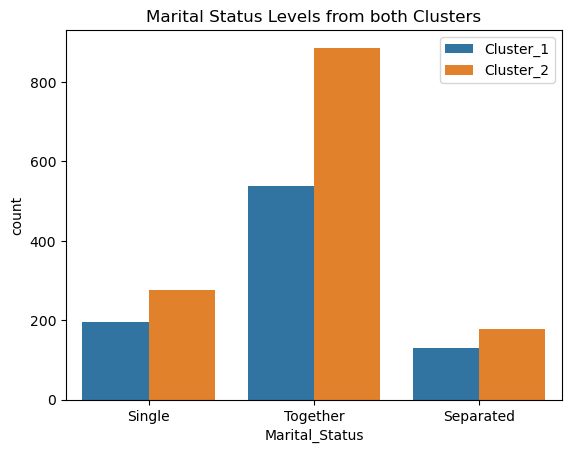

In [62]:
sns.countplot(x = 'Marital_Status', data = df_labeled, hue = 'cluster')
plt.title('Marital Status Levels from both Clusters')
plt.legend(labels = ['Cluster_1','Cluster_2'])
plt.show()

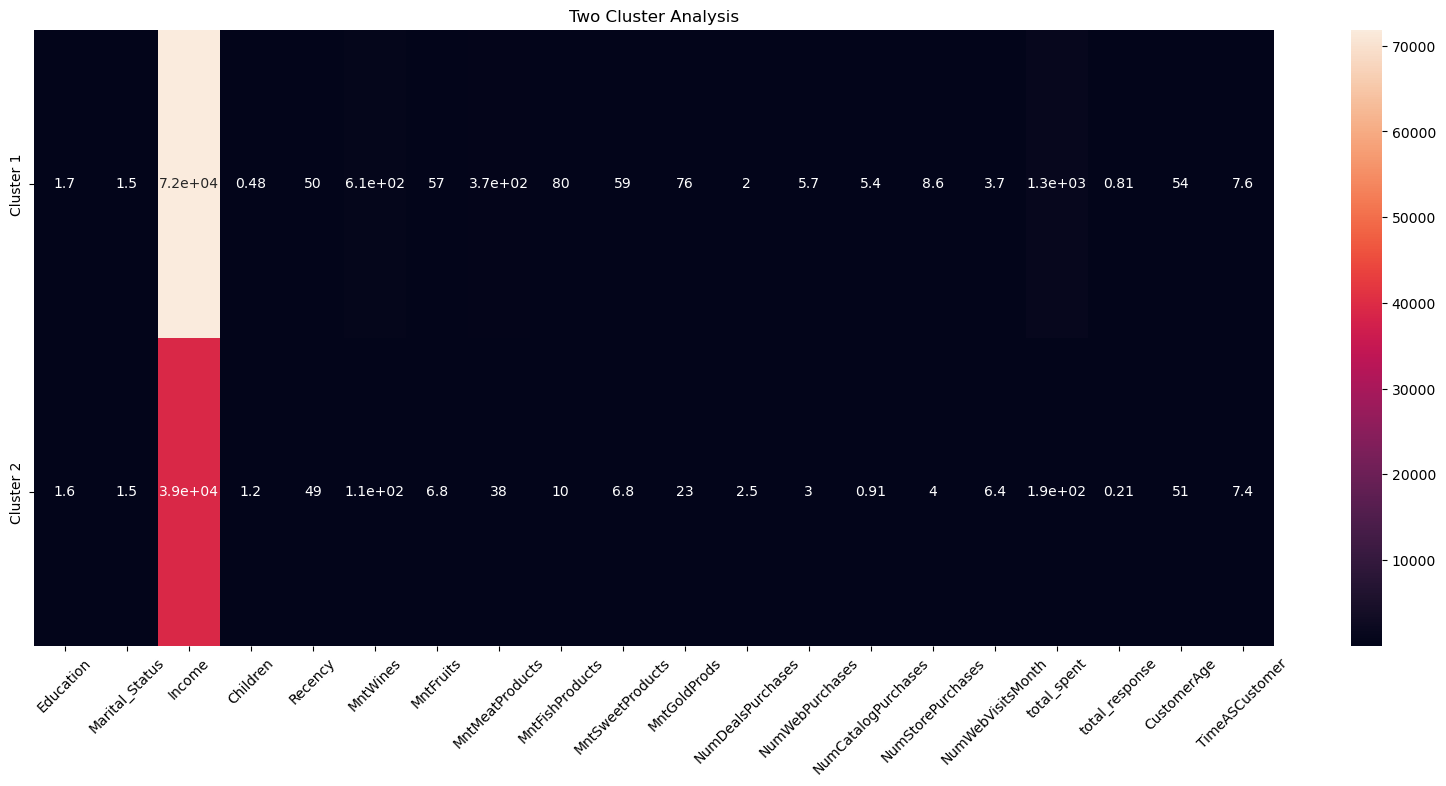

In [63]:
# get insights on our 2 clusters based on clusters centroids
plt.figure(figsize=(20,8))
plt.title('Two Cluster Analysis')
sns.heatmap(scaler.inverse_transform(kmeans_2.cluster_centers_),
            annot=True,
            yticklabels=['Cluster 1','Cluster 2'],
            xticklabels= df_features.columns)
plt.xticks(rotation = 45)
plt.show()

Above heatmap showcases the centroids between the two clusters. 

## Business Insights:
    
Cluster's Comparisons

First Cluster:

    - Income in general is greater than cluster 2 
    - Have overall less children 
    - Spent more on Meats and Fish products than cluster 2
    - did more Catalog purchases
    - spent over all more than cluster 2
    - Had slightly less Education than Cluster 2
    - Had less people who were single, together, seperated
    
Second Cluster:

    - Less overall income than cluster 1
    - Had more children than cluster 1
    - Had slightly More education
    - Spent less on Meats and Fish
    - had fewer catalog purchases than cluster 1
    - spent less in store than cluster 1
    - had more people who were single, together, seperated

## PCA Clustering

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

In [65]:
# Standardize our values first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)

# instantiate our PCA model with default settings
pca = PCA()
pca.fit(df_scaled)

PCA()

In [66]:
# an array that showcases the proportion of variance explained by each of the 20 components
# we have 20 components since we chose 20 features
pca.explained_variance_ratio_

array([3.60559060e-01, 9.62542355e-02, 7.14690442e-02, 5.92963197e-02,
       5.11512342e-02, 4.96825195e-02, 4.08193021e-02, 4.01193698e-02,
       3.55311932e-02, 3.08883471e-02, 3.05258804e-02, 2.40592053e-02,
       2.16265265e-02, 1.98339495e-02, 1.96886740e-02, 1.62978824e-02,
       1.24923043e-02, 1.11599726e-02, 8.54497978e-03, 1.99063885e-33])

In [67]:
# cumulative variance explained by the first 10 components
pca.explained_variance_ratio_[:10].sum()

0.8357706253887834

The first 10 components explain 83.65% of total variability on the original data. 

In [68]:
# fit PCA with only 10 components 
pca = PCA(n_components = 10)

# 10 components matrix
components = pca.fit_transform(df_scaled)

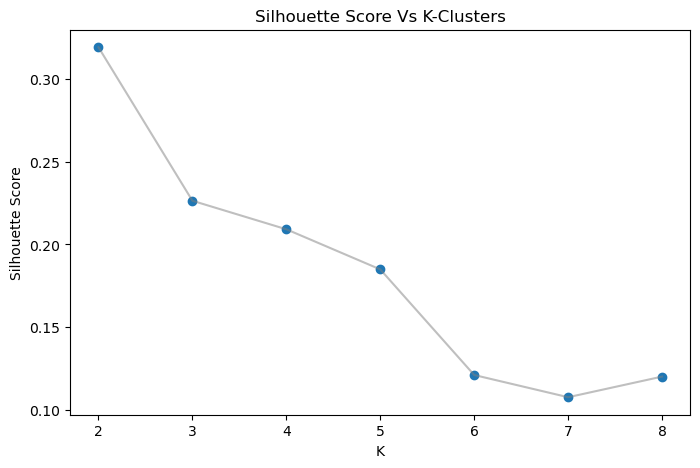

In [69]:
## Choosing the optimal number of clusters on PCA components using Silhouette Score metric
s_scores = []
for k in [2,3,4,5,6,7,8]:
    km = cluster.KMeans(n_clusters=k, n_init = 'auto', random_state = 0)
    km.fit(components)
    s_scores.append(metrics.silhouette_score(components, km.labels_, metric='euclidean'))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([2,3,4,5,6,7,8], s_scores, c='grey', alpha=0.5)
ax.scatter([2,3,4,5,6,7,8], s_scores)
ax.set_title('Silhouette Score Vs K-Clusters')
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
plt.show()

Observe how our silhouette score improved after we reduced the dimensions in our data.

In [70]:
# Kmeans clustering model with 2 clusters
km = cluster.KMeans(n_clusters=2, n_init = 'auto', random_state = 0)

# fit our pca components to our model
km.fit(components)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [71]:
# check the model labels 
print(km.labels_)

[1 0 1 ... 1 1 0]


In [72]:
silhouette_avg = metrics.silhouette_score(components, km.labels_)
silhouette_avg

0.3194521670341448

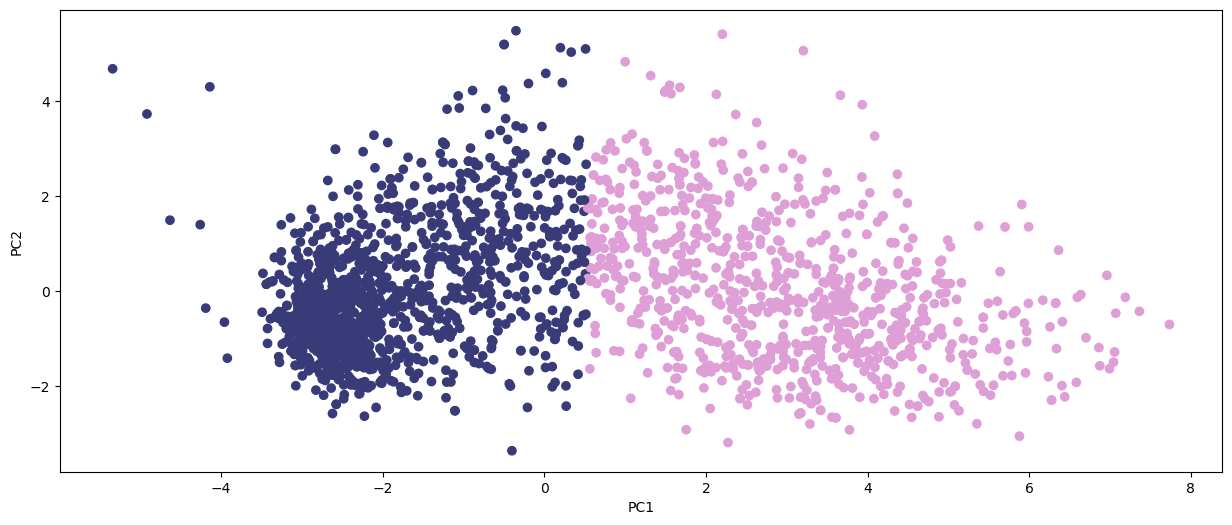

In [73]:
# plot the clusters
plt.figure(figsize=(15,6))  
plt.scatter(x = components[:,0],y = components[:,1], c=km.labels_, cmap = 'tab20b')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()